In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv('ml-latest-small/ratings.csv')
dataset.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# Question 1
num_movies = dataset['movieId'].nunique()
num_users = dataset['userId'].nunique()
sparsity = dataset.shape[0]/(num_users*num_movies)
print("Sparsity: ", sparsity)

Sparsity:  0.016439141608663475


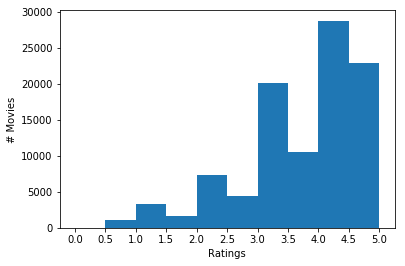

In [5]:
# Question 2
plt.hist(dataset['rating'],bins=np.arange(0, 5 + 0.5, 0.5))
plt.xticks(np.arange(0,5.5,0.5))
plt.xlabel("Ratings")
plt.ylabel("# Movies")
plt.show()

Text(0.5,0,'Movie ID')

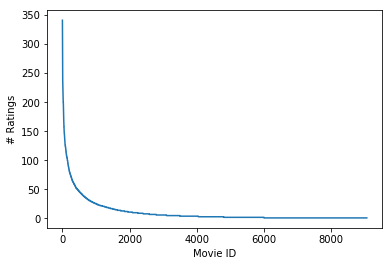

In [17]:
# Question 3
from collections import Counter
movie_ids = dataset['movieId']
movie_ratings_dict = dict(Counter(movie_ids))
plt.plot(range(0,len(movie_ratings_dict.keys())), sorted(movie_ratings_dict.values(),reverse=True))
plt.ylabel("# Ratings")
plt.xlabel("Movie ID")

Text(0.5,0,'User ID')

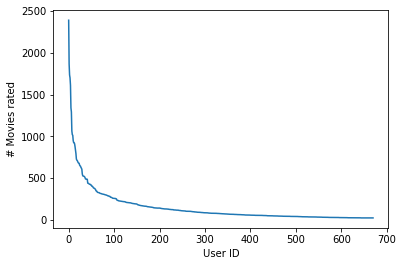

In [18]:
# Question 4
user_ids = dataset['userId']
user_ratings_dict = dict(Counter(user_ids))
plt.plot(range(0,len(user_ratings_dict.keys())), sorted(user_ratings_dict.values(),reverse=True))
plt.ylabel("# Movies rated")
plt.xlabel("User ID")

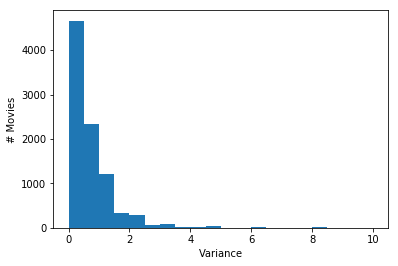

In [19]:
# Question 6
var_list = list(dataset[['movieId','rating']].groupby('movieId').var()['rating'])
plt.hist(np.nan_to_num(var_list),bins=np.arange(min(var_list), max(var_list), 0.5))
plt.xlabel("Variance")
plt.ylabel("# Movies")
plt.show()

In [20]:
id_var = (dataset[['movieId','rating']].groupby('movieId',as_index=False)).var().fillna(0)
id_var_dict = dict(zip(list(id_var['movieId']), id_var['rating']))

In [21]:
popular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
unpopular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
high_variance_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
high_variance_movieids = [x for x in high_variance_movieids if id_var_dict[x]>=2 ]

In [22]:
popular_movie_dataset = dataset.loc[dataset['movieId'].isin(popular_movieids)]
unpopular_movie_dataset = dataset.loc[dataset['movieId'].isin(unpopular_movieids)]
highvar_movie_dataset = dataset.loc[dataset['movieId'].isin(high_variance_movieids)]

In [23]:
def get_popular_dataset(testset):
    popular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    popular_movie_dataset = dataset.loc[dataset['movieId'].isin(popular_movieids)]
    return popular_movie_dataset

def get_unpopular_dataset(testset):
    unpopular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    unpopular_movie_dataset = dataset.loc[dataset['movieId'].isin(unpopular_movieids)]
    return unpopular_movie_dataset

def get_highvar_dataset(testset):
    high_variance_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    high_variance_movieids = [x for x in high_variance_movieids if id_var_dict[x]>=2 ]
    highvar_movie_dataset = dataset.loc[dataset['movieId'].isin(high_variance_movieids)]
    return highvar_movie_dataset

<h2>Part 6</h2>

In [24]:
from sklearn.model_selection import KFold

In [25]:
# Function that returns mean rating of the user
def mean_rating(user):
    user_dataset = dataset.loc[dataset['userId'] == user]
    l = len(user_dataset)
    rating_sum = np.sum(user_dataset['rating'])
    return rating_sum/l

In [26]:
mean_rating(1)

2.5499999999999998

In [27]:
def rmse(preds, true_vals):
    change = preds-true_vals
    rms = np.sqrt(np.sum(c*c for c in change))
    return rms/len(preds)

In [28]:
def naive_cf(df, subset):
    error = []
    for i in range(10):
        kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
        result = next(kf.split(df), None)
        train = df.iloc[result[0]]
        test =  df.iloc[result[1]]
        if subset == 'entire':
            test2 = test
        if subset == 'popular':
            test2 = get_popular_dataset(test)
        if subset == 'unpopular':
            test2 = get_unpopular_dataset(test)
        if subset == 'highvar':
            test2 = get_highvar_dataset(test)
        predictions = [mean_rating(i) for i in test2['userId']]
        error.append(rmse(predictions, test2['rating']))
    print("RMSE 10-fold cross validation: ", np.sum(error)/10)

In [30]:
# Question 30
print("Entire dataset")
naive_cf(dataset, "entire")

Entire dataset
RMSE 10-fold cross validation:  0.00945855717302


In [31]:
# Question 31
print("Popular movie dataset")
naive_cf(dataset, "popular")

Popular movie dataset
RMSE 10-fold cross validation:  0.00309672353362


In [32]:
# Question 32
print("Unpopular movie dataset")
naive_cf(dataset, "unpopular")

Unpopular movie dataset
RMSE 10-fold cross validation:  0.0136684295982


In [33]:
# Question 33
print("High variance movie dataset")
naive_cf(dataset, "highvar")

High variance movie dataset
RMSE 10-fold cross validation:  0.0485738386232
